In [26]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import pandas as pd

In [29]:
# 영화 제목 뽑아내기 
data = pd.read_excel('/Users/dongyokim/main/jupyter/2022:2/Movie_Project/데이터 전처리/영화 제목 및 정보 main_dataset_10_3.xlsx')

# 영화 제목 레스트 
title_list = data['영화명'].to_list()

title_list

['극한직업',
 '어벤져스: 엔드게임',
 '겨울왕국 2',
 '범죄도시 2',
 '알라딘',
 '신과함께-인과 연',
 '어벤져스: 인피니티 워',
 '기생충',
 '보헤미안 랩소디',
 '엑시트',
 '백두산',
 '스파이더맨: 파 프롬 홈',
 '탑건: 매버릭',
 '스파이더맨: 노 웨이 홈',
 '미션 임파서블: 폴아웃',
 '닥터 스트레인지: 대혼돈의 멀티버스',
 '신과함께-죄와 벌',
 '캡틴 마블',
 '쥬라기 월드: 폴른 킹덤',
 '앤트맨과 와스프',
 '안시성',
 '블랙 팬서',
 '완벽한 타인',
 1987,
 '조커',
 '독전',
 '아쿠아맨',
 '공작',
 '봉오동 전투',
 '남산의 부장들',
 '라이온 킹',
 '나쁜 녀석들: 더 무비',
 '다만 악에서 구하소서',
 '베놈',
 '반도',
 '데드풀 2',
 '암수살인',
 '국가부도의 날',
 '82년생 김지영',
 '분노의 질주: 홉스&쇼',
 '모가디슈',
 '코코',
 '그것만이 내 세상',
 '토이 스토리 4',
 '돈',
 '악인전',
 '시동',
 '마녀',
 '탐정: 리턴즈',
 '이터널스',
 '인크레더블 2',
 '블랙 위도우',
 '서치',
 '가장 보통의 연애',
 '쥬라기 월드: 도미니언',
 '너의 결혼식',
 '말모이',
 '마녀(魔女) Part2. The Other One',
 '곤지암',
 '지금 만나러 갑니다',
 '목격자',
 '증인',
 '블랙머니',
 '조선명탐정: 흡혈괴마의 비밀',
 '신비한 동물들과 그린델왈드의 범죄',
 '터미네이터: 다크 페이트',
 '히트맨',
 '사바하',
 '메이즈 러너: 데스 큐어',
 '분노의 질주: 더 얼티메이트',
 '맘마미아!2',
 '레디 플레이어 원',
 '타짜: 원 아이드 잭',
 '싱크홀',
 '극장판 귀멸의 칼날: 무한열차편',
 '신의 한 수: 귀수편',
 '베놈 2: 렛 데어 비 카니지',
 '명당',
 '소울',
 '천문: 하늘에 묻는다',
 '테넷',
 '크루엘라',
 '협상',


In [33]:
### 1단계: url 수집 ###

def Get_Url():
    driver = webdriver.Chrome('/Users/dongyokim/main/jupyter/chromedriver/chromedriver')
    driver.implicitly_wait(2)

    driver.get("https://movie.naver.com/")
    time.sleep(1)

    url_list = []
    # 최초 페이지에서 영화 제목 입력해주는 코드

    for query_txt in title_list:

        element = driver.find_element(By.CSS_SELECTOR,'#ipt_tx_srch')
        element.send_keys(query_txt)  # 검색어 입력
        element.send_keys("\n")  # 키보드 엔터 버튼
        time.sleep(0.5)
        try:
            # 일단 해당 영화의 url만 추출해오자 
            url = driver.find_element(By.CSS_SELECTOR,'#old_content > ul:nth-child(4) > li:nth-child(1) > dl > dt > a').get_attribute('href')
            # 최종 url 리스트에 append
            url_list.append(url)
        except:
            print('##### 영화명 {}의 url 정보가 없습니다. ######'.format(query_txt))
            url_list.append('None url')

    print('######url 수집을 완료했습니다. ######')
    driver.quit()
    
    return url_list

# driver.find_element(By.XPATH,'//*[@id="old_content"]/ul[2]/li[1]/p').click() # 검색 버튼 클릭


In [ ]:
# url 수집 함수 실행
url_list = Get_Url()

url_list

- 위에서는 글자 하나씩 뽑아와야 되니 밑의 요약된 화면을 이용하자
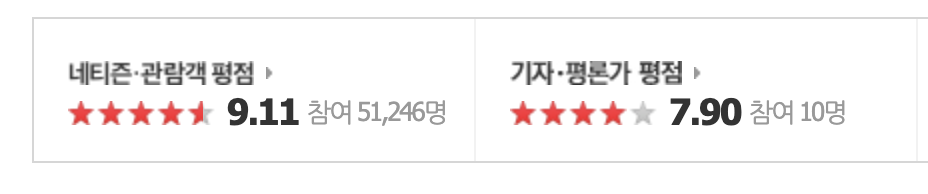

In [31]:
### 2단계: 수집한 url에 하나씩 접속하여 영화 평점 정보 긁어오기 

def NaverMovieRate_Crawling():
    
    driver = webdriver.Chrome('/Users/dongyokim/main/jupyter/chromedriver/chromedriver')
    driver.implicitly_wait(2)

    final_rate_list = []

    # 영화명과 url을 기준으로 반복 진행
    for url, name in zip(url_list, title_list):
        # 해당 url 접속
        try:
            driver.get(url)
            time.sleep(1)

        except:
            print('###### 영화명 {}의 url로 접속할 수 없습니다. ######')
            # 반복문 탈출 
            continue
        # 하트 수
        try:
            like_count = driver.find_element(By.CSS_SELECTOR, 'div.mv_info_area > div.mv_info > div.btn_sns > div.end_btn_area > ul > li:nth-child(4) > div > a > em').text
        except:
            like_count = '정보 없음'
        try:
            # 네티즌, 관람객 평점
            audience_rate = driver.find_element(By.CSS_SELECTOR, 'div.score_area > div.netizen_score > div > div > em').text
        except:
            audience_rate = '정보 없음'

        try:
            #네티즌, 관람객 평점 참여자 수
            audience_rate_count = driver.find_element(By.CSS_SELECTOR, 'div.score_area > div.netizen_score > div > span > em').text
        except:
            audience_rate_count = '정보 없음'

        try:
            # 기자, 평론가 평점 
            journalist_rate = driver.find_element(By.CSS_SELECTOR, 'div.score_area > div.special_score > div > div > em').text
        except:
            journalist_rate = '정보 없음'

        try:
            # 기자, 평론가 평점 참여자 수
            journalist_rate_count = driver.find_element(By.CSS_SELECTOR, 'div.score_area > div.special_score > div > span > em').text
        except:
            journalist_rate_count = '정보 없음'

        try:   
            one_rate_count = driver.find_element(By.CSS_SELECTOR, 'div.score_total > strong > em').text
        except:
            one_rate_count = '정보 없음'

        final_rate_list.append([name, audience_rate, audience_rate_count, journalist_rate, journalist_rate_count, one_rate_count, like_count])

    final_data = pd.DataFrame(data=final_rate_list, columns=['영화명', '네티즌, 관람객 평점', '네티즌, 관람객 평점 참여자', '기자, 평론가 평점', '기자, 평론가 평점 참여자', '한줄평 참여자', '하트 수'])
    
    return final_data

In [ ]:
# 평점 데이터 수집 함수 실행 
final_data = NaverMovieRate_Crawling()
final_data.head()

In [ ]:
# 현재 날짜 기준으로 저장
today_date = datetime.today().strftime("%Y_%m_%d%") 

# 데이터를 원하는 형식으로 저장(csv일 경우 to_csv)
final_data.to_excel('Naver_Movie_Rate_dataset_{}.xlsx'.format(today_date))

---

In [7]:

score_list = driver.find_elements(By.XPATH, '//*[@id="content"]/div[1]/div[2]/div[1]')

movie_name_list=[]
movie_name = driver.find_element(By.XPATH, '//*[@id="content"]/div[1]/div[2]/div[1]/h3/a[1]').text

for score in score_list : 
    
    Ascore_list = []
    Jscore_list = []
    Nscore_list = []
    
    
    
    audience_score_10 = score.find_element(By.XPATH,'//*[@id="actualPointPersentBasic"]/div/em[1]').text
    audience_score_1 = score.find_element(By.XPATH,'//*[@id="actualPointPersentBasic"]/div/em[3]').text
    audience_score_0 = score.find_element(By.XPATH,'//*[@id="actualPointPersentBasic"]/div/em[4]').text

    journalist_score_10 = score.find_element(By.XPATH,'//*[@id="content"]/div[1]/div[2]/div[1]/div[1]/div[2]/div/a/div/em[1]').text
    journalist_score_1 = score.find_element(By.XPATH,'//*[@id="content"]/div[1]/div[2]/div[1]/div[1]/div[2]/div/a/div/em[3]').text
    journalist_score_0 = score.find_element(By.XPATH,'//*[@id="content"]/div[1]/div[2]/div[1]/div[1]/div[2]/div/a/div/em[4]').text

    netizen_score_10 = score.find_element(By.XPATH,'//*[@id="pointNetizenPersentBasic"]/em[1]').text
    netizen_score_1 = score.find_element(By.XPATH,'//*[@id="pointNetizenPersentBasic"]/em[3]').text
    netizen_score_0 = score.find_element(By.XPATH,'//*[@id="pointNetizenPersentBasic"]/em[4]').text

    Ascore_list.append([audience_score_10, '.',audience_score_1, audience_score_0])
    Jscore_list.append([journalist_score_10,'.', journalist_score_1, journalist_score_0])
    Nscore_list.append([netizen_score_10,'.', netizen_score_1, netizen_score_0])

In [10]:
Ascore = pd.DataFrame(data = Ascore_list, columns=['10의 자리','.','1의 자리', '소수점'])
Ascore['관람객 평점'] = Ascore['10의 자리'] + Ascore['.'] + Ascore['1의 자리'] + Ascore['소수점']
del Ascore['10의 자리']
del Ascore['1의 자리']
del Ascore['.']
del Ascore['소수점']
Ascore['영화명'] = movie_name

Jscore = pd.DataFrame(data = Jscore_list, columns=['10의 자리','.','1의 자리', '소수점'])
Jscore['기자/평론가 평점'] = Jscore['10의 자리'] + Jscore['.'] + Jscore['1의 자리'] + Jscore['소수점']
del Jscore['10의 자리']
del Jscore['1의 자리']
del Jscore['.']
del Jscore['소수점']
Jscore['영화명'] = movie_name

Nscore = pd.DataFrame(data = Nscore_list, columns=['10의 자리','.','1의 자리', '소수점'])
Nscore['네티즌 평점'] = Nscore['10의 자리'] + Nscore['.'] + Nscore['1의 자리'] + Nscore['소수점']
del Nscore['10의 자리']
del Nscore['1의 자리']
del Nscore['.']
del Nscore['소수점']
Nscore['영화명'] = movie_name

tscore = pd.merge(Ascore, Jscore, how = 'left', on ='영화명')
total_score = pd.merge(tscore, Nscore, how = 'left', on='영화명')
total_score = total_score[['영화명', '관람객 평점', '기자/평론가 평점', '네티즌 평점']]
total_score

,영화명,관람객 평점,기자/평론가 평점,네티즌 평점
0,탑건: 매버릭,9.60,8.44,9.76
